# Ensemble

### 1. Voting
- Hard Voting
    - 여러 모델을 통해 예측한 class의 개수들로 최종 결과를 판단

- Soft Voting
    - 여러 모델을 통해 예측한 class의 확률 평균으로 최종 결과를 판단


In [ ]:
# Module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# Raw Data Loading
Iris = load_iris()
df_iris = pd.DataFrame(Iris.data, columns=Iris.feature_names)
df_iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris['target'] = Iris.target

# 중복 데이터 제거
df_iris = df_iris.drop_duplicates()

# feature, target 추출
x_data = df_iris.drop(['target'], axis=1).values
t_data = df_iris['target'].values

# normalization
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# train, test split
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = train_test_split(x_data_norm,
                                                                                  t_data,
                                                                                  stratify=t_data,
                                                                                  test_size=0.3,
                                                                                  random_state=0)

In [ ]:
# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(x_data_train_norm,
              t_data_train)

knn_acc = accuracy_score(t_data_test, knn_model.predict(x_data_test_norm))
print(f'KNN 모델의 accuracy: {knn_acc}')  # 0.97

# SVC Model
svm_model = SVC(kernel='linear',
                C=0.5)

svm_model.fit(x_data_train_norm,
              t_data_train)

svm_acc = accuracy_score(t_data_test, svm_model.predict(x_data_test_norm))
print(f'SVM 모델의 accuracy: {svm_acc}')  # 0.97

# Decision Tree
dt_model = DecisionTreeClassifier()

dt_model.fit(x_data_train_norm,
             t_data_train)

dt_acc = accuracy_score(t_data_test, dt_model.predict(x_data_test_norm))
print(f'Decision Tree 모델의 accuracy: {svm_acc}')  # 0.97

KNN 모델의 accuracy: 0.9777777777777777
SVM 모델의 accuracy: 0.9777777777777777
Decision Tree 모델의 accuracy: 0.9777777777777777


##### 1-1. Hard Voting Classifier

In [ ]:
hvc = VotingClassifier(estimators=[('KNN', knn_model),
                                   ('SVM', svm_model),
                                   ('DT', dt_model)],
                       voting='hard')

hvc.fit(x_data_train_norm, t_data_train)

hvc_acc = accuracy_score(t_data_test, hvc.predict(x_data_test_norm))
print(f'앙상블 모델(hard voting)의 accuracy: {hvc_acc}')  # 0.97

앙상블 모델(hard voting)의 accuracy: 0.9777777777777777


##### 1-2. Soft Voting Classifier

In [ ]:
# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(x_data_train_norm,
              t_data_train)

knn_acc = accuracy_score(t_data_test, knn_model.predict(x_data_test_norm))
print(f'KNN 모델의 accuracy: {knn_acc}')  # 0.97

# SVC Model
svm_model = SVC(kernel='linear',
                C=0.5,
                probability=True)  # soft voting은 확률이 필요

svm_model.fit(x_data_train_norm,
              t_data_train)

svm_acc = accuracy_score(t_data_test, svm_model.predict(x_data_test_norm))
print(f'SVM 모델의 accuracy: {svm_acc}')  # 0.97

# Decision Tree
dt_model = DecisionTreeClassifier()

dt_model.fit(x_data_train_norm,
             t_data_train)

dt_acc = accuracy_score(t_data_test, dt_model.predict(x_data_test_norm))
print(f'Decision Tree 모델의 accuracy: {dt_acc}')  # 0.97

KNN 모델의 accuracy: 0.9777777777777777
SVM 모델의 accuracy: 0.9777777777777777
Decision Tree 모델의 accuracy: 0.9777777777777777


In [ ]:
hvc = VotingClassifier(estimators=[('KNN', knn_model),
                                   ('SVM', svm_model),
                                   ('DT', dt_model)],
                       voting='soft')

hvc.fit(x_data_train_norm, t_data_train)

hvc_acc = accuracy_score(t_data_test, hvc.predict(x_data_test_norm))
print(f'앙상블 모델(soft voting)의 accuracy: {hvc_acc}') # 0.97

앙상블 모델(soft voting)의 accuracy: 0.9777777777777777


### 2. Bagging
- Voting 방식과 유사한데 Bagging 방식은 같은 모델 여러 개를 사용
- 같은 모델이라도 데이터를 다르게 하여 사용
- 예측된 class의 개수를 통해 최종 결과를 확정
- Bagging 방식을 이용할 때 Model이 Decision Tree이면 Random Forest

In [ ]:
%reset

# Module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Raw Data Loading
Iris = load_iris()
df_iris = pd.DataFrame(Iris.data, columns=Iris.feature_names)
df_iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris['target'] = Iris.target

# 중복 데이터 제거
df_iris = df_iris.drop_duplicates()

# feature, target 추출
x_data = df_iris.drop(['target'], axis=1).values
t_data = df_iris['target'].values

# normalization
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# train, test split
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = train_test_split(x_data_norm,
                                                                                  t_data,
                                                                                  stratify=t_data,
                                                                                  test_size=0.3,
                                                                                  random_state=0)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier()

dt_model.fit(x_data_train_norm,
             t_data_train)

dt_acc = accuracy_score(t_data_test, dt_model.predict(x_data_test_norm))
print(f'Decision Tree 모델의 accuracy: {dt_acc}')  # 0.95

rfc = RandomForestClassifier(n_estimators=50,  # Decision Tree의 개수
                             max_depth=3,  # 각 트리의 depth, 커지면 복잡한 모델이 되지만 overfitting의 가능성도 존재
                             random_state=20)

rfc.fit(x_data_train_norm,
             t_data_train)

rfc_acc = accuracy_score(t_data_test, rfc.predict(x_data_test_norm))
print(f'RandomForest 모델의 accuracy: {rfc_acc}')  # 1.0

Decision Tree 모델의 accuracy: 0.9555555555555556
RandomForest 모델의 accuracy: 1.0


### 3. Boosting
- 여러 개의 가벼운 Model을 순차적으로 학습
- 잘못 예측한 데이터에 대해 오차를 줄일 수 있는 방향으로 Model을 Update
- 일반적으로 Boosting 모델이 좋은 결과를 냄
- 대표적으로 사용되는 XGBoost Model

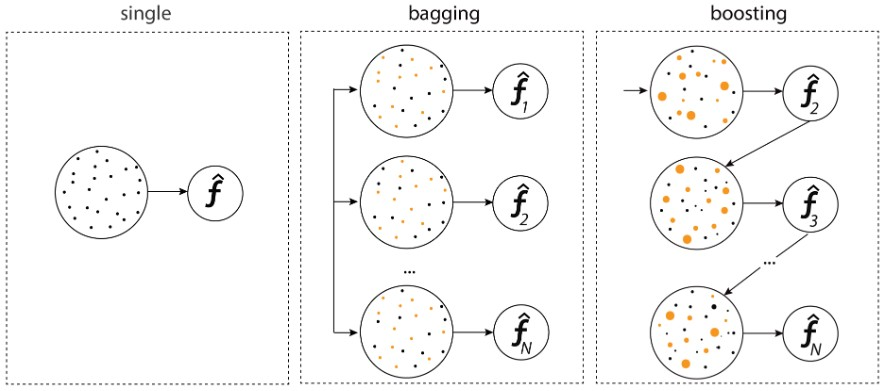

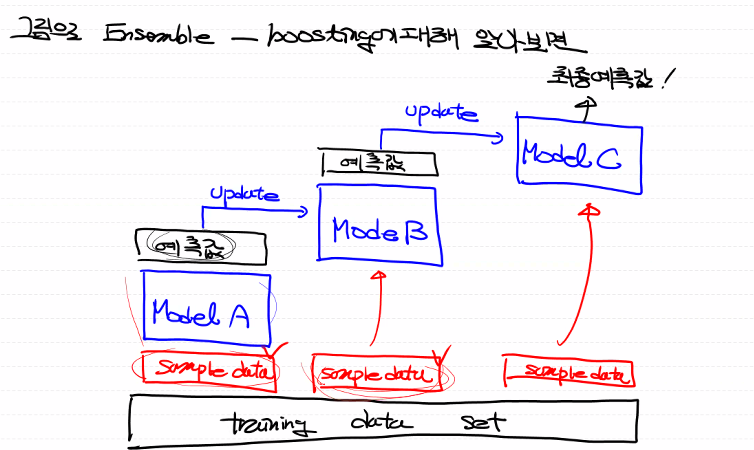

In [ ]:
%reset

# Module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Raw Data Loading
Iris = load_iris()
df_iris = pd.DataFrame(Iris.data, columns=Iris.feature_names)
df_iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris['target'] = Iris.target

# 중복 데이터 제거
df_iris = df_iris.drop_duplicates()

# feature, target 추출
x_data = df_iris.drop(['target'], axis=1).values
t_data = df_iris['target'].values

# normalization
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# train, test split
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = train_test_split(x_data_norm,
                                                                                  t_data,
                                                                                  stratify=t_data,
                                                                                  test_size=0.3,
                                                                                  random_state=0)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
# Model
xgb = XGBClassifier(n_estimators=50,  # Decision Tree의 개수
                    max_depth=3,
                    random_state=20)

xgb.fit(x_data_train_norm,
             t_data_train)

xgb_acc = accuracy_score(t_data_test, xgb.predict(x_data_test_norm))
print(f'XGB 모델의 accuracy: {xgb_acc}')  # 0.95

XGB 모델의 accuracy: 0.9555555555555556
